# 분류

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') ## 경고가 떠도 무시해라

#DecisionTreeClassifier 생성
dt_clf= DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩
iris_data = load_iris()
#학습과 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=156)

In [2]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names ,feature_names = iris_data.feature_names, impurity=True, filled=True) 


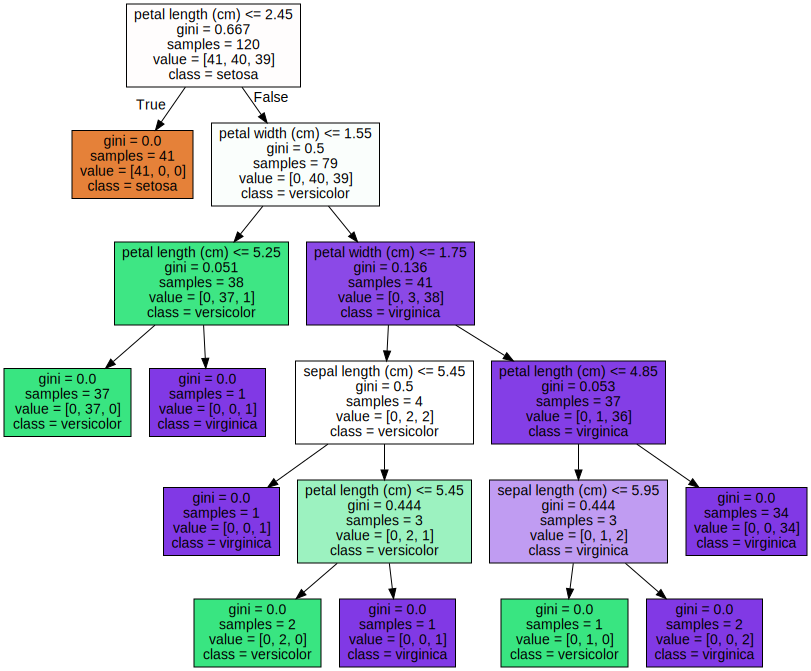

In [4]:
import graphviz

with open("tree.dot") as f:
    dot_grap = f.read()
graphviz.Source(dot_grap)

In [5]:
dt_clf.feature_importances_

#array 4개가 밑에 나오는 그래프의 값들이다

array([0.02500521, 0.        , 0.55490281, 0.42009198])

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

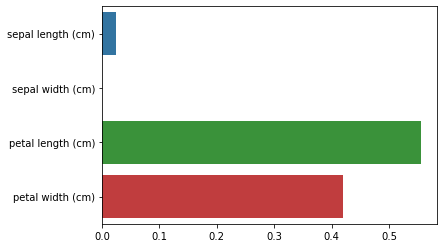

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names) 

# 결정트리 실습- 사용자 행동 인식 데이터 세트

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어있음. 이를 Dataframe으로 로드
feature_name_df=pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names= ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10]) 

Using matplotlib backend: <object object at 0x0000018798FF2A20>
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [8]:
#중복된 피처명이 얼마나 있는지 
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head(10) 

#42개의 피처명이 중복돼 있음

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [9]:
# 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 df을 반환하는 get_new_feature_name_df()를 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df 

In [10]:
#get_new_feature_name_df()는 get_human_dataset 내에서 적용돼 중복된 피처명으 새로운 피처명으로 할당

import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset() 

In [11]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [12]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [13]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params()) 

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [16]:
# p. 206 

# 결정 트리의 트리 깊이가 예측 정확도에 주는 영향
from sklearn.model_selection import GridSearchCV

params= {'max_depth' : [6,8,10,12,16,20,24],   #늘리면서 예측성능 측정
         'min_samples_split': [16]}  #고정

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)    #cv=5는 교차검증은 5세트
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [17]:
# GridSearchCV 객체의 cv_results_ 속성을 df으로 생성
cv_reuslts_df = pd.DataFrame(grid_cv.cv_results_)

In [18]:
#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_reuslts_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [19]:
#가장 높은 정확도
pred1 = grid_cv.predict(X_test)
accuracy_score(y_test, pred1)

0.8717339667458432

In [20]:
#가장 높은 예측 정확도
best_df_clf= grid_cv.best_estimator_
best_df_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [21]:
grid_cv.best_estimator_.feature_importances_ 

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [22]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

In [23]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show() 

# 의사결정나무(Decision Tree)
: 의사결정규칙을 나무구조로 도표화 하여 분류와 예측을 수행하는 통계 분석기법

- 목적 
    ex)  나쁨/ 좋음 신용상태
    - 세분화: 각 고객이 어떤 집단에 속하는지 파악
    - 분류: 여러 변수에 근거해 반응 변수의 범주를 분류하고자 하는 경우
    - 예측: 데이터에서 규칙을 찾아내서 미래의 사건을 예측하고자 하는 경우

- 특징
    - 뿌리마디(Root node): 나무 구조가 시작되는 노드 - 분할기준(splitting rule)의 선택
    - 중간마디(intermediate node): 끝마디가 아닌 노드들 - 정지규칙(stopping rule)
    - 끝마디(Terminal node): 각 나무줄기의 끝으로 분류 규칙은 끝나는 노드 개수만큼 생성- 예측값 할당법
    
- 의사결정나무는 분류(classification) 와 회귀(regression) 모두 가능하다

# 반응 변수 적용 분리 기준
- 범주형
    - 카이제곱 통계량의 P값 :
    p값이 가장 작은 예측 변수와 그 때의 최적 분리에 의해서 자식 마디를 형성
    - 지니지수 :
    불순도를 측정하는 하나의 지수로서 지니 지수를 가장 감소시켜주는 예측변수와 
                 그 때의 최적 분리에 의해서 자식 마디를 선택
    - 엔트로피 지수 : 
    이 지수가 가장 작은 예측 변수와 그 때의 최적 분리에 의해서 자식 마디 형성


- 수치형
    - 분산 분석에서의 F통계량 :
    p값이 가장 작은 예측 변수와 그 때의 최적 분리에 의해서 자식 마디 형성
    - 분산의 감소량 : 
    예측 오차를 최소화 하는 것과 동일한 기준으로 분산의 감소랭을 최대화 하는 기준의 최적 분리에
    의해서 자식 마디 형성

- 지니지수(Gini index)의 정의
: 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표로 불순도를 측정한다
ex) 전체 16개 중 빨간색 10개, 파란색 6개
빨강= 10/16
파랑= 6/16
1-[{(10/16)**2}-{(6/16)**2}]=0.47


# 의사결정나무의 학습 과정
- 재귀적 분기(Recursive Partitioning)
: 구분하기 접보다 구분된 뒤 각 영역의 순도가 증가하도록 입력 변수의 영역을 두개로 구분
    - 특정영역에 속하는 개체들을 하나의 기준 변수 값의 범위에 따라 분기
    - 새로 생성될 자식 노드의 동질성이 최대화되도록 분기점을 선택
    - 불순도를 측정하는 기준으로는 범주형 변수에 대해 지니계수, 수치형 변수에 대해 분산을 이용한다
    - 분기 횟수가 정해지지 않은 채로 사전에 설정한 기준을 만족할 때 까지 분기를 반복

- 가지치기(Pruning)
    - Full tree: 모든 Terminal node의 순도가 100%인 상태
    - Full tree를 생성한 뒤 적절한 수준에서 Terminal node를 결합
    - 의사결정나무의 분기수가 증가할 때 처음에는 새로운 데이터에 
    대한 오분류율이 감소하나 일정 수준 이상이 되면 오분류율이 증가한다.

- 과적합(Overfitting)을 방지하기 위하여 너무 자세하게 구분된 영역을 통합

# 의사결정나무의 학습 진행 방향
- 구분 뒤 각 영역의 순도가 증가/ 불확실성(엔트로피, 지니지수)이 최대한 감소하는 방향으로 학습 진행


# 3. 앙상블- Voting

In [25]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer= load_breast_cancer()

data_df= pd.DataFrame(cancer.data, columns= cancer. feature_names)

data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [26]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상븧
vo_clf =VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target,
                                                  test_size=0.2, random_state=156)

#Votingclassifier 학습 예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/ 예측/ 평가
classifiers= [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0}정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression정확도 : 0.9474
KNeighborsClassifier정확도 : 0.9386


# 4. 랜덤포레스트(Bagging)
- Bagging은 bootstrap aggregating의 줄인말이다.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [28]:
accuracy

0.9195792331184255

In [29]:
# 데이터를 불러옴

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어있음. 이를 Dataframe으로 로드
feature_name_df=pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names= ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10]) 

Using matplotlib backend: QtAgg
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [30]:
# 랜덤포레스트 하이퍼 파라미터 및 튜닝

from sklearn.model_selection import GridSearchCV

params= {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16],
    'n_estimators' :[10,100] 
    
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier( n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9165


In [31]:
print(grid_cv.best_score_)

0.9164853101196953


In [32]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=16, min_samples_leaf=6, n_jobs=-1,
                       random_state=0)

In [33]:
grid_cv.best_params_

{'max_depth': 16,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [34]:
rf_clf1= grid_cv.best_estimator_
pred=rf_clf1.predict(X_test)
accuracy_score(y_test,pred)

0.9260264675941635

In [35]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:10] 

angle(X,gravityMean)              0.035312
tGravityAcc-mean()-Y              0.033729
tGravityAcc-min()-X               0.030276
angle(Y,gravityMean)              0.029013
tGravityAcc-max()-X               0.027538
tGravityAcc-mean()-X              0.024708
tGravityAcc-energy()-X            0.024389
tGravityAcc-min()-Y               0.023339
tGravityAcc-max()-Y               0.021011
fBodyAccJerk-bandsEnergy()-1,8    0.018636
dtype: float64

()

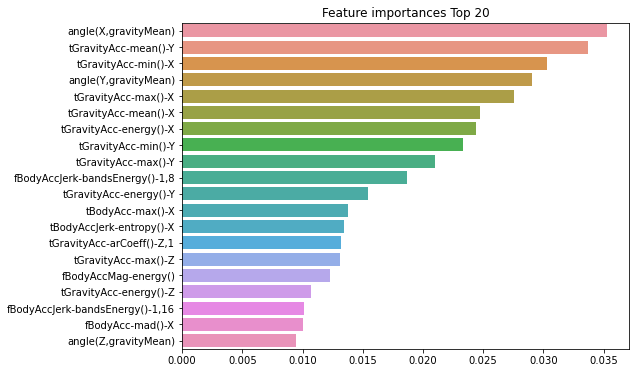

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show
() 

# 5. GBM(Gradient Boosting Machine)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train, y_test = get_human_dataset()

#GBM수행 시간 측정을 위함.
start_time=time.time()
gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred= gb_clf.predict(X_test)
gb_accuracy =accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print("GBM 수행시간: {0:.1f}초".format(time.time()-start_time))

KeyboardInterrupt: 

# 6. XGBoost(eXtra Grandient Boost)

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier

In [39]:
import xgboost
xgboost.__version__

'1.5.0'

In [40]:
# XGXGBClassifier를 임포트
from xgboost import XGBClassifier

#Warning메시지를 없애기 위해 
xgb_wrapper =XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds= xgb_wrapper.predict(X_test)
w_preds_proba =xgb_wrapper.predict_proba(X_test)[:,1]

In [41]:
cancer= load_breast_cancer()
X=cancer.data
y=cancer.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=156)
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=.2, random_state=156)

In [43]:
xgb_wrapper =XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')

In [44]:
xgb_wrapper.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
w_preds= xgb_wrapper.predict(X_test)
w_preds

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [48]:
w_pred_proba =xgb_wrapper.predict_proba(X_test)[:,1]
w_pred_proba 

array([0.958151  , 0.05387714, 0.65738547, 0.2901813 , 0.9710354 ,
       0.97798663, 0.9772371 , 0.97798663, 0.97798663, 0.02388305,
       0.02733054, 0.02388305, 0.9777134 , 0.97798663, 0.97798663,
       0.96955967, 0.97386104, 0.97798663, 0.97798663, 0.97798663,
       0.02565667, 0.22581823, 0.02388305, 0.9718963 , 0.02388305,
       0.84174794, 0.02681874, 0.02388305, 0.9764746 , 0.1429714 ,
       0.97649276, 0.02565667, 0.97649276, 0.4840012 , 0.03314285,
       0.02388305, 0.97798663, 0.97798663, 0.46456322, 0.96266127,
       0.32655135, 0.97798663, 0.97649276, 0.9764164 , 0.97798663,
       0.76706827, 0.13734624, 0.97798663, 0.9777134 , 0.97798663,
       0.9729604 , 0.02388305, 0.97798663, 0.97697574, 0.97386104,
       0.97649276, 0.97798663, 0.9551108 , 0.9764746 , 0.8151555 ,
       0.97798663, 0.8425834 , 0.02825144, 0.02388305, 0.9777134 ,
       0.97386104, 0.02825144, 0.97798663, 0.97798663, 0.97798663,
       0.02825144, 0.97798663, 0.02388305, 0.94875294, 0.97798

In [49]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, recall_score

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 4 73]]
정확도: 0.9474, 정밀도: 0.9733, 재현율: 0.9481,    F1: 0.9605, AUC:0.9919


In [51]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [53]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [54]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 4 73]]
정확도: 0.9474, 정밀도: 0.9733, 재현율: 0.9481,    F1: 0.9605, AUC:0.9919


### 2회

In [55]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)] # 미입력해도 됨
xgb_wrapper.fit(X_tr, y_tr, 
                early_stopping_rounds=50, 
                eval_metric="logloss", 
                eval_set=evals, 
                verbose=False) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws50_preds, ws50_pred_proba) 

오차 행렬
[[35  2]
 [ 4 73]]
정확도: 0.9474, 정밀도: 0.9733, 재현율: 0.9481,    F1: 0.9605, AUC:0.9919


In [57]:
# 10으로
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)] # 미입력해도 됨
xgb_wrapper.fit(X_tr, y_tr, 
                early_stopping_rounds=10, 
                eval_metric="logloss", 
                eval_set=evals, 
                verbose=False) 

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba) 

오차 행렬
[[35  2]
 [ 4 73]]
정확도: 0.9474, 정밀도: 0.9733, 재현율: 0.9481,    F1: 0.9605, AUC:0.9919


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

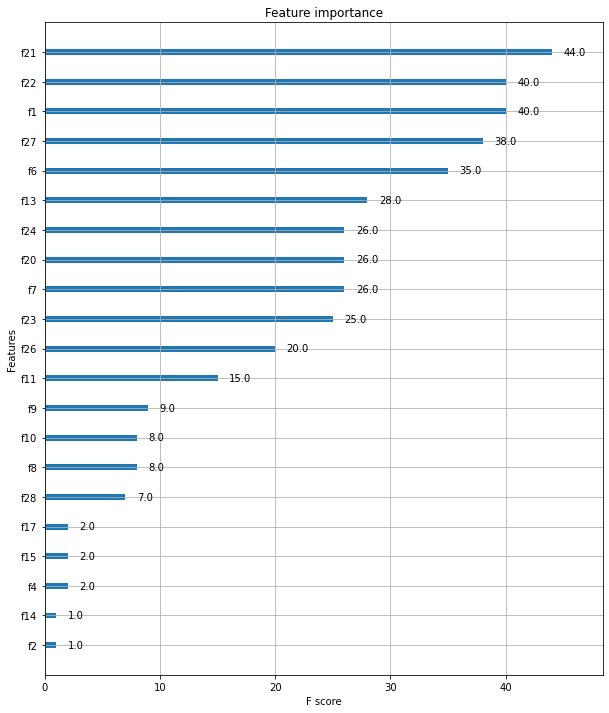

In [58]:
# P.239
# 피쳐중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax) 

# 7. LightGBM

In [67]:
import lightgbm

### LightGBM적용- 위스콘신 유방암 예측

In [68]:
#불러오기

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [69]:
# p.250
#LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassfier임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset= load_breast_cancer()
cancer_df= pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

cancer_df['target']=dataset.target
X_features=cancer_df.iloc[:, :-1]
y_label=cancer_df.iloc[:,-1]

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
# 위에서 만든 X_train, y_train을 쪼개서 90%는 학습, 10%는 검증용
X_tr, X_val, y_tr, y_val=train_test_split(X_train,y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimaators=400 설정
lgbm_wrapper=LGBMClassifier(n_estimators=400, learning_rate=0.05)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals=[(X_tr, y_tr),(X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

In [70]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

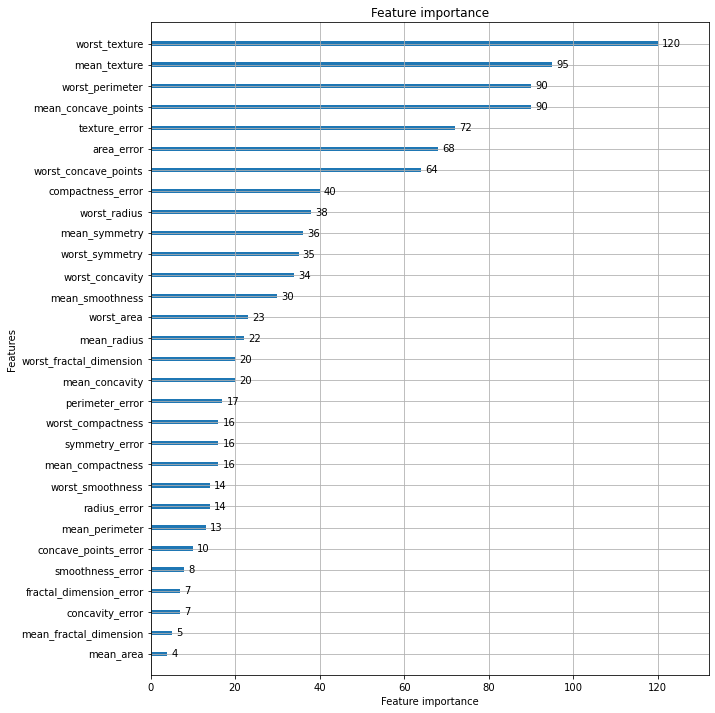

In [73]:
# plot_importance()을 이용해 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

# 8. 베이지안 최적화 기반의 HyperOPt를 이용한 하이퍼 파라미터 튜닝

### HyperOpt로 최적의 하이퍼파라미터 찾기

In [34]:
!pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)


In [253]:
from hyperopt import hp
import numpy as np

In [254]:
#-10~10까지 1간격을 가지는 입력변수 x와 -15~15까지 1간격으로 입력변수 y설정
#1. 범위설정
search_space={'x': hp.quniform('x', -10, 10, 1),
              'y': hp.quniform('y', -15, 15, 1)}

In [255]:
#retval=x**2 - 20*y

In [256]:
#2. 목적함수를 생성(설정)
from hyperopt import STATUS_OK

#목적함수를 생성, 변숫값, 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x= search_space['x']
    y= search_space['y']
    retval=x**2 - 20*y
    
    return retval

In [259]:
from hyperopt import fmin, tpe, Trials
trial_val=Trials()

# 3. fmin()으로 x,y값 찾기
# 목적 함수의 최솟값을 반환하는 최적 입력 변숫 값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best01 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5,
              trials = trial_val, rstate = np.random.default_rng(seed=0))
print('best:', best01)

#최적화를 위한 x,y를 찾아줌
# x=0, y=-15 와 비교해보면 잘 맞지 않음

100%|████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1002.75trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [260]:
trial_val=Trials()

#max_evals를 20회로 늘려서 재테스트
best02 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 10,
              trials = trial_val, rstate = np.random.default_rng(seed=0))
print('best:', best02)

100%|██████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1114.74trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [38]:
best03 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20,
    trials = trial_val, rstate = np.random.default_rng(seed=0))
print(best03)

100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1002.61trial/s, best loss: -296.0]
{'x': 2.0, 'y': 15.0}


In [39]:
best04 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100,
    trials = trial_val, rstate = np.random.default_rng(seed=0))
print('best:', best04)

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 166.24trial/s, best loss: -299.0]
best: {'x': -1.0, 'y': 15.0}


In [40]:
# X범위:-2 ~ 2
# y범위:13~ :
#5*3=15번만 돌려주면됨

In [41]:
best03.items()

dict_items([('x', 2.0), ('y', 15.0)])

In [42]:
best03.values()

dict_values([2.0, 15.0])

In [45]:
trial_val.results

[{'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -40.0, 'status': 'ok'},
 {'loss': 281.0, 'status': 'ok'},
 {'loss': 64.0, 'status': 'ok'},
 {'loss': 100.0, 'status': 'ok'},
 {'loss': 261.0, 'status': 'ok'},
 {'loss': -276.0, 'status': 'ok'},
 {'loss': -264.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -299.0, 'status': 'ok'},
 {'loss': -156.0, 'status': 'ok'},
 {'loss': 161.0, 'status': 'ok'},
 {'loss': -244.0, 'status': 'ok'},
 {'loss': -136.0, 'status': 'ok'},
 {'loss

In [51]:
trial_val.vals

{'x': [-6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  -6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  -6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  2.0,
  10.0,
  -9.0,
  -8.0,
  -0.0,
  1.0,
  2.0,
  6.0,
  2.0,
  -1.0,
  -2.0,
  -1.0,
  6.0,
  -2.0,
  6.0,
  -2.0,
  3.0,
  1.0,
  7.0,
  0.0,
  -1.0,
  -6.0,
  3.0,
  5.0,
  -3.0,
  8.0,
  1.0,
  -7.0,
  -5.0,
  3.0,
  -10.0,
  -3.0,
  5.0,
  -5.0,
  -1.0,
  2.0,
  -7.0,
  4.0,
  8.0,
  -3.0,
  0.0,
  -5.0,
  5.0,
  2.0,
  1.0,
  -9.0,
  -1.0,
  10.0,
  -2.0,
  4.0,
  2.0,
  2.0,
  3.0,
  -0.0,
  1.0,
  -1.0,
  7.0,
  5.0,
  -2.0,
  3.0,
  -0.0,
  1.0,
  2.0,
  -4.0,
  7.0,
  4.0,
  6.0,
  -3.0,
  3.0,
  8.0,
  2.0,
  4.0,
  -6.0,
  -2.0,
  -1.0,
  -7.0,
  -5.0,
  1.0,
  0.0,
  -4.0,
  6.0,
  -3.0,
  5.0,
  -2.0,
  2.0],
 'y': [5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  15.0,
  7.0,
  -10.0,
  0.0,
  -5.0,
  -13.0,
  14.0,
  15.0,
  15.0,
  15.0,
  8.0,
  -8.0,
  14.0,
  7.0,
  3.0,
  9.0,
  

In [263]:
import pandas as pd
# results에서 loss 키값에 해당하는 value들을 추출하여 list로 생성
losses= [loss_dict['loss'] for loss_dict in trial_val.results]

#DataFrame으로 생성
result_df=pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## XGboost+Hyperopt

In [87]:
dataset = load_breast_cancer()
X = features = dataset.data
y = labels = dataset.target

In [264]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
# 위에서 만든 X_train, y_train을 쪼개서 90%는 학습, 10%는 검증용
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 156)

In [265]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [266]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):   #목적함수 만들기
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [267]:
# fmin()을 이용해 최적 하이퍼파라미터를 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best) 

100%|███████████████████████████████████████████████| 50/50 [00:06<00:00,  7.78trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [270]:
#정수형, 실수형 하이퍼파라미터 변환
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'], 5),
                                                                                            round(best['learning_rate'],5),
                                                                                            int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.54241, learning_rate:0.12601, max_depth:17, min_child_weight:2


In [277]:
xgb_clf = XGBClassifier(n_estimators=400, max_depth=17,
                            min_child_weight=2,
                            learning_rate=0.126,
                            colsample_bytree=0.54,
                            )

In [283]:
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose=True)
preds = xgb_clf.predict(X_test)
get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [278]:
xgb_clf.fit(X_train, y_train)

[16:34:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.54,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.126, max_delta_step=0, max_depth=17,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [279]:
from sklearn.metrics import accuracy_score

In [280]:
preds = xgb_clf.predict(X_test)

In [281]:
accuracy_score(y_test, preds)

0.9649122807017544

In [276]:
preds

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

# 9 분류 실습- 캐글 산탄데르 고객만족예측

In [173]:
import os
os.getcwd()

'C:\\Users\\user\\머신러닝'

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [388]:
warnings.filterwarnings('ignore')
cust_df = pd.read_csv("C:/Users/user/머신러닝/train.csv")
print('dataset shape:', cust_df.shape)
#cust_df.head(3)
cust_df[:3]

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [389]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [390]:
cust_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [391]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [392]:
#df['target']의 0과 1의 %는?
cust_df['TARGET'].value_counts()/len(cust_df)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [393]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [394]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [395]:
cust_df['var3'].min()

-999999

In [396]:
#-999999를 2로 바꾸어주세요
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)
cust_df[:3]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [397]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 214.6 MB


In [398]:
# ID를 지우고 ,Target은 Labels로 분리
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]



#x의 칼럼 갯수는 369개

In [399]:
X_features.shape

(76020, 369)

In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                   test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt=y_test.count()
print('학습 세트 shape:{0}, 테스트 세트 shape:{1}'.format(X_train.shape, X_test.shape))

print('학습세트 레이블 값 분포 비율')
print(y_train.value_counts()/ train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)
학습세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [375]:
y_train.value_counts()/len(y_train)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [401]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [385]:
 y_tr

59689    0
61395    0
31100    0
38633    0
56184    0
        ..
31883    0
59495    0
22295    0
49446    0
40713    0
Name: TARGET, Length: 42571, dtype: int64

### XGBoost모델 학습과 하이퍼 파라미터 튜닝

In [402]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
#n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

In [404]:
# 성능 평가 지표를 auc로 조기 중단 파라미터는 100으로 설정하고 학습수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [405]:
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

ROC AUC:0.8429


In [407]:
preds = xgb_clf.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [408]:
accuracy_score(y_test, preds)

0.9583004472507235

In [409]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

0.842853493090032

## hyperopt 적용

In [205]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [215]:
#목적함수
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate'])
    
# 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
roc_auc_list= []

# 3개 k-fold방식 적용 
kf = KFold(n_splits=3)
# X_train을 다시 학습과 검증용 데이터로 분리
for tr_index, val_index in kf.split(X_train):
   # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
    xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

    # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
return -1 * np.mean(roc_auc_list) 

[0]	validation_0-auc:0.99721	validation_1-auc:0.93776
[1]	validation_0-auc:0.99691	validation_1-auc:0.93548
[2]	validation_0-auc:0.99799	validation_1-auc:0.95015
[3]	validation_0-auc:0.99797	validation_1-auc:0.95571
[4]	validation_0-auc:0.99820	validation_1-auc:0.95827
[5]	validation_0-auc:0.99892	validation_1-auc:0.95918
[6]	validation_0-auc:0.99885	validation_1-auc:0.95890
[7]	validation_0-auc:0.99908	validation_1-auc:0.95972
[8]	validation_0-auc:0.99931	validation_1-auc:0.95972
[9]	validation_0-auc:0.99922	validation_1-auc:0.96045
[10]	validation_0-auc:0.99940	validation_1-auc:0.97394
[11]	validation_0-auc:0.99940	validation_1-auc:0.97312
[12]	validation_0-auc:0.99954	validation_1-auc:0.97330
[13]	validation_0-auc:0.99954	validation_1-auc:0.97330
[14]	validation_0-auc:0.99954	validation_1-auc:0.97403
[15]	validation_0-auc:0.99958	validation_1-auc:0.97357
[16]	validation_0-auc:0.99963	validation_1-auc:0.97330
[17]	validation_0-auc:0.99963	validation_1-auc:0.97348
[18]	validation_0-au

SyntaxError: 'return' outside function (3026167521.py, line 33)

In [ ]:
from hyperopt import fmin, tpe, Trials
trials=Trials()

best=fmin(fn=objective_func,
        space=xgb_search_space,
        algo=tpe.suggest,
        max_evals=50,
        trials=trials,rstate=np.random.default_rng(seed=30))
print('best:', best)

[0]	validation_0-auc:0.98928	validation_1-auc:0.94870                                                                  
[1]	validation_0-auc:0.99216	validation_1-auc:0.96610                                                                  
[2]	validation_0-auc:0.99246	validation_1-auc:0.96537                                                                  
[3]	validation_0-auc:0.99290	validation_1-auc:0.96701                                                                  
[4]	validation_0-auc:0.99684	validation_1-auc:0.97950                                                                  
[5]	validation_0-auc:0.99693	validation_1-auc:0.97859                                                                  
[6]	validation_0-auc:0.99698	validation_1-auc:0.97758                                                                  
[7]	validation_0-auc:0.99684	validation_1-auc:0.98068                                                                  
[8]	validation_0-auc:0.99689	validation_

# LightGBM + Hyperopt

In [219]:
#목적함수
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score= roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.983269	training's binary_logloss: 0.597994	valid_1's auc: 0.975164	valid_1's binary_logloss: 0.581209
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.984823	training's binary_logloss: 0.536961	valid_1's auc: 0.966885	valid_1's binary_logloss: 0.523808
[3]	training's auc: 0.988088	training's binary_logloss: 0.486272	valid_1's auc: 0.974586	valid_1's binary_logloss: 0.474738
[4]	training's auc: 0.988403	training's binary_logloss: 0.443587	valid_1's auc: 0.978725	valid_1's binary_logloss: 0.434852
[5]	training's auc: 0.988538	training's binary_logloss: 0.407172	valid_1's auc: 0.984501	valid_1's binary_logloss: 0.400288
[6]	training's auc: 0.989687	training's binary_logloss: 0.374508	valid_1's auc: 0.983539	valid_1's binary_logloss: 0.368567
[7]	training's auc: 0.991961	training's binary_logloss: 0.342767	valid_1's auc: 0.982865	valid_1's binary_logloss: 0.343252
[8]	training's auc: 0.992501	training's binary_logloss: 0.318553	valid

In [412]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves',32, 64, 1), 
                    'max_depth': hp.quniform('max_depth', 100, 160, 1),
                    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7,1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [413]:
# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    lgbm_clf = XGBClassifier(n_estimators=100,
                             num_leaves=int(search_space['num_leaves']),
                             max_depth=int(search_space['max_depth']),
                             min_child_samples=search_space['min_child_samples'],
                             subsample=search_space['subsample'],
                             learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []

    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
       # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1*np.mean(roc_auc_list) 

In [416]:
def objective_func(search_space):
    lgbm_clf=LGBMClassifier(n_estimators=100,
                           num_leaves=int(search_space['num_leaves']),
                           max_depth= int(search_space['max_depth']),
                           min_child_samples=int(search_space['min_child_samples']),
                           learnig_rate=search_space['learnig_rate'])
    #3개 K-fold방식으로 평가된 roc_auc지표를 담는 list
    roc_auc_list=[]
    
    #3개 K-fold방식 적용
    kf=KFold(n_split=3)
    #X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr=X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val=X_train.iloc[val_index], y_train.iloc[val_indx]
        
        #early stopping을 30회로 설정 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                    eval_set=[(X_tr, y_tr), (X_val, y_val)])
        #1로 예측한 확률값 추출 후 orc auc 계산하고 평균 roc auc계산을 위해 list에 결과값 담음
        score=roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
        return -1*np.mean(roc_auc_list)

In [419]:
from hyperopt import fmin, tpe, Trials
trials=Trials()

best=fmin(fn=objective_func, 
         space=xgb_search_space,
         algo=tpe.suggest,
         max_evals=50,
         trials=trials, rstate=np.random.default_rng(seed=30))
print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: 'num_leaves'



  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]


KeyError: 'num_leaves'

In [421]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf=XGBClassifier(n_estimators=500, learnig_rate=round(best['learning_rate'],5),
                     max_depth=int(best['max_depth']),
                     min_child_weight=int(best['min_child_weight']),
                     colsample_bytree=round(best['colsample_bytree'], 5))
# evaluation metrics을 auc로, early stopping은 100으로 설정
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[18:10:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "learnig_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.83085	validation_1-auc:0.80869
[1]	validation_0-auc:0.85257	validation_1-auc:0.81364
[2]	validation_0-auc:0.86422	validation_1-auc:0.81560
[3]	validation_0-auc:0.87819	validation_1-auc:0.81528
[4]	validation_0-auc:0.89245	validation_1-auc:0.81252
[5]	validation_0-auc:0.89983	validation_1-auc:0.81308
[6]	validation_0-auc:0.91255	validation_1-auc:0.81555
[7]	validation_0-auc:0.91942	validation_1-auc:0.81306
[8]	validation_0-auc:0.92578	validation_1-auc:0.81587
[9]	validation_0-auc:0.92961	validation_1-auc:0.81245
[10]	validation_0-auc:0.93384	validation_1-auc:0.80866
[11]	validation_0-auc:0.93979	validation_1

In [423]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplot(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

### LightGBM모델 학습과 하이퍼파라미터 튜닝

In [424]:
from lightgbm import LGBMClassifier
lgbm_clf= LGBMClassifier(n_estimators=500)\

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

In [ ]:
lgbm_search_space={'num_leves': hp.qu}

# 캐클 신용카드 사기 검출

In [ ]:
# 10.18 p.279

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
card.shape

(284807, 31)

In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [101]:
card=pd.read_csv("C:/Users/user/머신러닝/creditcard.csv")
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [102]:
# 1. Time 칼럼을 삭제
card = card.drop(['Time'], axis=1)

In [93]:
#2. dataset 분리
from sklearn.model_selection import train_test_split

features= card.iloc[:,:-1]
labels=card.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.3, stratify= labels)

In [53]:
y_train.value_counts()/len(y_train)

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [54]:
len(y_train)

199364

In [94]:
# 3. 모델생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter= 1000)
lr_clf.fit(X_train, y_train)
preds= lr_clf.predict(X_test)
preds_proba= lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85281    14]
 [   50    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6622,    F1: 0.7538, AUC:0.9790


In [95]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [56]:
labels.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [111]:
# 3.1 모델 생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85284    11]
 [   46   102]]
정확도: 0.9993, 정밀도: 0.9027, 재현율: 0.6892,    F1: 0.7816, AUC:0.9849


## 데이터 정제 후 적용

In [71]:
card['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [86]:
#  표준화 하기(표준정규분포로 바꿔서 0,1로 바꾸기)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
s= scaler.fit_transform(card['Amount'].values.reshape(-1,1))
s

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [84]:
#array를 한개의 칼럼으로 붙이기
card['Amount_temp'] = s
card

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_temp
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [85]:
card[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_temp
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686


In [ ]:
#2. dataset 분리
from sklearn.model_selection import train_test_split

features= card.iloc[:,:-1]
labels=card.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.3, stratify= labels)

In [88]:
# 3. 모델생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter= 1000)
lr_clf.fit(X_train, y_train)
preds= lr_clf.predict(X_test)
preds_proba= lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, preds_proba)

오차 행렬
[[85281    14]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9704


In [112]:
# 3.1 모델 생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]


## 데이터 정제(로그변환)후 적용

In [ ]:
#로그를 사용하는 이유: 숫자가 너무 커서
#10000000000
# log10=10으로 줄일수있음

In [103]:
card=pd.read_csv("C:/Users/user/머신러닝/creditcard.csv")
# 1. Time 칼럼을 삭제
card = card.drop(['Time'], axis=1)

In [104]:
s= scaler.fit_transform(card['Amount'].values.reshape(-1,1))
s

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [107]:
card['Amount']= np.log1p(card['Amount'])
card[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0


In [115]:
#2. dataset 분리
from sklearn.model_selection import train_test_split

features= card.iloc[:,:-1]
labels=card.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.3, stratify= labels)

# 3. 모델생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter= 1000)
lr_clf.fit(X_train, y_train)
preds= lr_clf.predict(X_test)
preds_proba= lr_clf.predict_proba(X_test)[:, 1]
print(get_clf_eval(y_test, preds, preds_proba))

# 3.1 모델 생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]
print(get_clf_eval(y_test, preds, preds_proba))

오차 행렬
[[85286     9]
 [   68    80]]
정확도: 0.9991, 정밀도: 0.8989, 재현율: 0.5405,    F1: 0.6751, AUC:0.9656
None
오차 행렬
[[85286     9]
 [   68    80]]
정확도: 0.9991, 정밀도: 0.8989, 재현율: 0.5405,    F1: 0.6751, AUC:0.9656
None


## 데이터 이상치 제거 후 적용

In [ ]:
# 1. 이상치 찾기
IQR= 3/4(75%)-1/4(25%)
3/4 + 1.5IQR
1/4 - 1.5IQR

In [118]:
card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [119]:
fraud= card[card['Class']==1]
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.272877,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,5.484506,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,4.094345,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.968708,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.565314,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,4.368054,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,5.505332,1


In [ ]:
# 이상치를 갖고있는 row를 찾고 없애기

In [122]:
fraud['V14']

541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64

In [169]:
#p.290
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud=df[df['Class']==1][column]
    quantile_25= np.percentile(fraud.values, 25)
    quantile_75= np.percentile(fraud.values, 75)
    
    #IQR을 구하고 IQR에 1.5를 곱해 최댓값, 최솟값 지점 구함
    iqr= quantile_75 - quantile_25
    iqr_weight= iqr * weight
    lowest_val= quantile_25 - iqr_weight
    highest_val= quantile_75 + iqr_weight
    #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index반환
    outlier_index=fraud[(fraud<lowest_val)| (fraud> highest_val)].index
    return outlier_index

In [155]:
outlier_index= get_outlier(df=card, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [157]:
#방법2
pct75 =fraud['V14'].quantile(0.75)
pct25 =fraud['V14'].quantile(0.25)
IQR=pct75-pct25
upper=pct75+1.5*IQR
lower=pct25-1.5*IQR
fraud[(fraud['V14']<=upper) |(fraud['V14']>=lower)] 
fraud['V14'][(fraud['V14']>=upper) |(fraud['V14']<=lower)] 

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [158]:
# 방벙3
iqr = fraud['V14'].quantile(0.75) - fraud['V14'].quantile(0.25)
con1 = fraud['V14'] <= fraud['V14'].quantile(0.25) - 1.5*iqr
con2 = fraud['V14'] >= fraud['V14'].quantile(0.75) + 1.5*iqr

fraud['V14'][con1 | con2] 

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [159]:
#방법4
Q1 = np.percentile(fraud['V14'],25)
Q3 = np.percentile(fraud['V14'],75)
IQR = Q3-Q1

fraud = fraud.query(" V14 > @Q3+1.5*@IQR or V14 < @Q1 -1.5*@IQR ")
fraud 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,0.693147,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,0.693147,1
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,0.693147,1
9252,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,0.693147,1


In [166]:
outlier=fraud[(fraud['V14']>upper)| (fraud['V14']<lower)]
outlier.index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [171]:
card.drop(outlier.index) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895,0


In [173]:
outlier.index

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [177]:
card.shape

(284807, 30)

In [182]:
card= card.drop(labels=[8296, 8615, 9035, 9252], axis=0)
card

KeyError: '[8296, 8615, 9035, 9252] not found in axis'

## Smote 로 오버샘플링

In [190]:
#2. dataset 분리
from sklearn.model_selection import train_test_split

features= card.iloc[:,:-1]
labels=card.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.3, stratify= labels)

# 3. 모델생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter= 1000)
lr_clf.fit(X_train, y_train)
preds= lr_clf.predict(X_test)
preds_proba= lr_clf.predict_proba(X_test)[:, 1]
print(get_clf_eval(y_test, preds, preds_proba))

# 3.1 모델 생성, fit, predict, evaluation
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000) #반복개수를 1000번
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
preds_proba = lr_clf.predict_proba(X_test)[:, 1]
print(get_clf_eval(y_test, preds, preds_proba))

오차 행렬
[[85283    12]
 [   59    87]]
정확도: 0.9992, 정밀도: 0.8788, 재현율: 0.5959,    F1: 0.7102, AUC:0.9721
None
오차 행렬
[[85283    12]
 [   59    87]]
정확도: 0.9992, 정밀도: 0.8788, 재현율: 0.5959,    F1: 0.7102, AUC:0.9721
None


In [191]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=0)
X_train_over, y_train_over= smote.fit_resample(X_train, y_train)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train.shape. y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train.shape. y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

AttributeError: 'NoneType' object has no attribute 'split'

In [187]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64